# Ajuste multilineal

En una función tridimensional estudiamos la función lineal:

y = $b_{0}$  + $b_{1}$ * $x_{1}$ + $b_{2}$ * $x_{2}$

Que es la ecuación de un plano en el espacio.
Este programa, permite calcular los parametros: $b_{0}$, $b_{1}$, $b_{2}$; para poder hallar la ecuación del plano.

## Importaciones.

En caso de no tener las siguientes librerias descargadas ejecutar el siguiente comando:

In [ ]:
!pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tabla de datos.

In [3]:
data = pd.read_csv('data/data.csv', sep='	')
data

,y,x_1,x_2
0,4,1,0
1,3,2,1
2,-2,-1,2
3,-3,0,3


## Cálculo de coeficientes.

Primero debemos de obtener los datos de las columnas de entrada y guardarlos en variables.

In [4]:
y = data['y']
x1 = data['x_1']
x2 = data['x_2']

In [5]:
X = np.column_stack((np.ones_like(x1), x1, x2)) #permite construir la matriz de diseño.

A continuación, mediante una función proporcionada por la libreria `numpy`, calcula los parámetros.

In [6]:
params, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
b0, b1, b2 = params
print(f"b_0: {b0:.3f}, b_1: {b1:.3f}, b_2: {b2:.3f}")

b_0: 3.000, b_1: 1.000, b_2: -2.000


In [7]:

print(f"La ecuación del plano es la siguiente: y = {b0:.3f} + {b1:.3f}*x_1 + {b2:.3f}*x_2")

La ecuación del plano es la siguiente: y = 3.000 + 1.000*x_1 + -2.000*x_2


## Visualización del plano de regresión.

Primero debemos de crear el plano de regresión. Mediante esta secuencia de código creamos una cuadrícula de puntos x, y en el espacio bidimensional de las variables predictoras (x_1 y x_2), y luego usando esos puntos para calcular los valores correspondientes z  siendo estos calcula os a través del plano calculado anteriormente.

In [ ]:
x = np.linspace(data['x_1'].min(), data['x_1'].max(), 100)
y = np.linspace(data['x_2'].min(), data['x_2'].max(), 100)
x, y = np.meshgrid(x, y)
z = b0 + b1 * x + b2 * y

A continuación ejecutamos lo siguiente para mostrarlo.

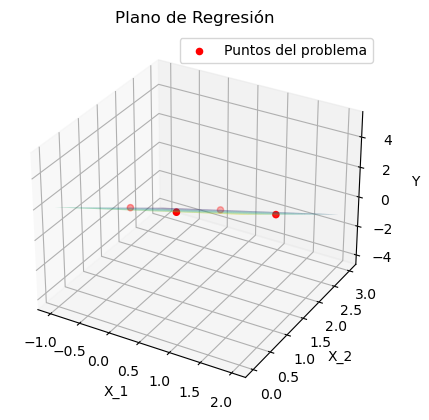

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficación de los puntos del problema
ax.scatter(data['x_1'], data['x_2'], data['y'], color='red', label='Puntos del problema')

# Graficación del plano de regresión
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')

ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
ax.set_title('Plano de Regresión')

ax.legend()
plt.show()